Anlyzing tweetz for some sucessful brands

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

def clean_text(text):
    # Remove special characters, URLs, and other unwanted elements
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    return text.strip()

def analyze_sentiment(tweets):
    positive = 0
    neutral = 0
    negative = 0

    for tweet in tweets:
        cleaned_tweet = clean_text(tweet)
        analysis = TextBlob(cleaned_tweet)
        sentiment_score = analysis.sentiment.polarity

        if sentiment_score > 0:
            positive += 1
        elif sentiment_score < 0:
            negative += 1
        else:
            neutral += 1

    total = len(tweets)
    positive_percentage = (positive / total) * 100
    neutral_percentage = (neutral / total) * 100
    negative_percentage = (negative / total) * 100

    return positive_percentage, neutral_percentage, negative_percentage

def plot_pie_chart(positive, neutral, negative):
    labels = 'Positive', 'Neutral', 'Negative'
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Sentiment Analysis Results')
    plt.show()

def main():
    file_path = 'phone_tweets.csv'
    df = pd.read_csv(file_path, encoding='latin1')

    user_query = input("Enter the word to search in tweets: ")

    # Filter tweets containing the user-specified word
    filtered_tweets = df[df['tweet'].str.contains(user_query, case=False)]['tweet'].tolist()

    if not filtered_tweets:
        print(f"No tweets found containing the word '{user_query}'.")
    else:
        print("Filtered Tweets:")
        for tweet in filtered_tweets:
            print("-", tweet)

        positive, neutral, negative = analyze_sentiment(filtered_tweets)
        print(f"\nPositive: {positive:.2f}%")
        print(f"Neutral: {neutral:.2f}%")
        print(f"Negative: {negative:.2f}%")

        plot_pie_chart(positive, neutral, negative)

     

if __name__ == "__main__":
    main()


Extracting positive tweets of sucessfull brands for key factor analysis 

In [8]:

def extract_positive_tweets(dataset):
    positive_tweets = []
    
    for index, row in dataset.iterrows():
        text = row["tweet"]
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(text)
        # Consider tweets with a polarity score greater than 0.5 as positive
        if analysis.sentiment.polarity > 0.5:
            positive_tweets.append(text)
    
    return positive_tweets
dataset = pd.read_csv("phone_tweets.csv")
# Assuming your original dataset is already loaded into 'dataset' variable
positive_tweets = extract_positive_tweets(dataset)

# Create a new dataset called 'usethis' with the positive tweets
usethis = pd.DataFrame({"tweet": positive_tweets})

# Save the new dataset to a CSV file
usethis.to_csv("postive_allbrands.csv", index=False)


key factor extraction 

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def extract_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    
    # Calculate word frequency distribution
    fdist = FreqDist(filtered_tokens)
    
    # Get the most common keywords
    keywords = [word for word, freq in fdist.most_common(50)]  # Adjust the number as needed
    
    return keywords

def extract_entities(text):
    doc = nlp(text)
    entities = [entity.text for entity in doc.ents if entity.label_ == "ORG" or entity.label_ == "PRODUCT"]
    return entities

def extract_positive_factors(tweets):
    positive_factors = defaultdict(int)
    
    for tweet in tweets:
        keywords = extract_keywords(tweet)
        entities = extract_entities(tweet)
        
        for keyword in keywords:
            positive_factors[keyword] += 1
        
        for entity in entities:
            positive_factors[entity] += 1
    
    # Sort the positive factors by frequency
    sorted_factors = sorted(positive_factors.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_factors

# Load your dataset
dataset = pd.read_csv("postive_allbrands.csv")  # Adjust the filename and path as needed

# Assuming your dataset has a column named "text" containing the tweets
tweets = dataset["tweet"].tolist()

# Use the extract_positive_factors function defined earlier
positive_factors_all = extract_positive_factors(tweets)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Analysing the tweets of a particular brand

Enter the word to search in tweets: screen
Filtered Tweets:
- Photo: Love IOS 8 @apple @iphone #Love #IOS8 #NoCrop #iphone #young #phone #screen #capturescream #boy... http://t.co/fIDj9FxHDV
- Then how the hell did I take this screenshot? @apple @timcook http://t.co/NvFWwi4JsM
- Imagine a world without cracked #iPhone screens! @Apple Patents Drop Protection Mechanism http://t.co/cOorkE2pbx http://t.co/D9qtmhDMmR
- @Apple gets patent to prevent cracked screens by rotating #iPhones as they fall: http://t.co/u23MhIOGjj http://t.co/0KR2KnuNQT #Apple
- @Apple gets patent to prevent cracked screens by rotating iPhones as they fall http://t.co/TmvY6OmQVN @tim_maliyil http://t.co/bQuuvuPfeR
- Yes @apple, now is a perfect time to lock my screen and install a software update without asking. #not
- 2/ At its announcement @samsung supporters criticized #AAPL for 'following' Samsung into the large screen game.
- @Apple gets patent 2prevent cracked screens by rotating falling #iPhones  http://t.co/H

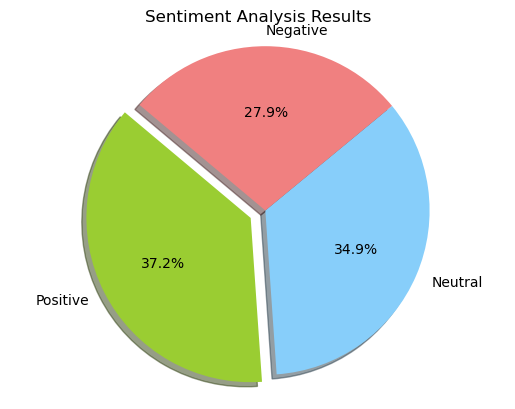

In [5]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

def clean_text(text):
    # Remove special characters, URLs, and other unwanted elements
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    return text.strip()

def analyze_sentiment(tweets):
    positive = 0
    neutral = 0
    negative = 0

    for tweet in tweets:
        cleaned_tweet = clean_text(tweet)
        analysis = TextBlob(cleaned_tweet)
        sentiment_score = analysis.sentiment.polarity

        if sentiment_score > 0:
            positive += 1
        elif sentiment_score < 0:
            negative += 1
        else:
            neutral += 1

    total = len(tweets)
    positive_percentage = (positive / total) * 100
    neutral_percentage = (neutral / total) * 100
    negative_percentage = (negative / total) * 100

    return positive_percentage, neutral_percentage, negative_percentage

def plot_pie_chart(positive, neutral, negative):
    labels = 'Positive', 'Neutral', 'Negative'
    sizes = [positive, neutral, negative]
    colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Sentiment Analysis Results')
    plt.show()

def main():
    file_path = 'Apple-Twitter-Sentiment-DFE.csv'
    df = pd.read_csv(file_path, encoding='latin1')

    user_query = input("Enter the word to search in tweets: ")

    # Filter tweets containing the user-specified word
    filtered_tweets = df[df['text'].str.contains(user_query, case=False)]['text'].tolist()

    if not filtered_tweets:
        print(f"No tweets found containing the word '{user_query}'.")
    else:
        print("Filtered Tweets:")
        for tweet in filtered_tweets:
            print("-", tweet)

        positive, neutral, negative = analyze_sentiment(filtered_tweets)
        print(f"\nPositive: {positive:.2f}%")
        print(f"Neutral: {neutral:.2f}%")
        print(f"Negative: {negative:.2f}%")

        plot_pie_chart(positive, neutral, negative)

     

if __name__ == "__main__":
    main()


Extarcting positive tweets of the particular brand

In [16]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
def extract_positive_tweets(dataset):
    positive_tweets = []
    
    for index, row in dataset.iterrows():
        text = row["text"]
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(text)
        # Consider tweets with a polarity score greater than 0.5 as positive
        if analysis.sentiment.polarity > 0.5:
            positive_tweets.append(text)
    
    return positive_tweets
dataset = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv",encoding="latin1")
# Assuming your original dataset is already loaded into 'dataset' variable
positive_tweets = extract_positive_tweets(dataset)

# Create a new dataset called 'usethis' with the positive tweets
usethis = pd.DataFrame({"tweet": positive_tweets})

# Save the new dataset to a CSV file
usethis.to_csv("usethis.csv", index=False)


Key factors that the brand contain

In [18]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def extract_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    
    # Calculate word frequency distribution
    fdist = FreqDist(filtered_tokens)
    
    # Get the most common keywords
    keywords = [word for word, freq in fdist.most_common(50)]  # Adjust the number as needed
    
    return keywords

def extract_entities(text):
    doc = nlp(text)
    entities = [entity.text for entity in doc.ents if entity.label_ == "ORG" or entity.label_ == "PRODUCT"]
    return entities

def extract_positive_factors(tweets):
    positive_factors = defaultdict(int)
    
    for tweet in tweets:
        keywords = extract_keywords(tweet)
        entities = extract_entities(tweet)
        
        for keyword in keywords:
            positive_factors[keyword] += 1
        
        for entity in entities:
            positive_factors[entity] += 1
    
    # Sort the positive factors by frequency
    sorted_factors = sorted(positive_factors.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_factors

# Load your dataset
dataset = pd.read_csv("usethis.csv")  # Adjust the filename and path as needed

# Assuming your dataset has a column named "text" containing the tweets
tweets = dataset["tweet"].tolist()

# Use the extract_positive_factors function defined earlier
positive_factors = extract_positive_factors(tweets)

# Print the results
print("Key positive factors:")
for factor, count in positive_factors:
    print(f"{factor}: {count}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Key positive factors:
apple: 177
best: 29
rt: 28
Apple: 25
iphone: 19
great: 17
aapl: 16
http: 15
lol: 11
@Apple: 11
onerepublic: 11
autocorrect: 9
changes: 9
good: 8
hsmoghul: 8
excited: 8
named: 8
apps: 7
nice: 7
The Motley Fool: 7
swiftkey: 7
steve: 6
6: 6
supply: 6
love: 5
excellent: 5
new: 5
awesome: 5
like: 5
would: 5
service: 5
google: 5
catching: 5
10: 4
jobs: 4
news: 4
stocks: 4
time: 4
thank: 4
could: 4
tech: 4
iphone6: 4
facebook: 4
2014: 4
ipad: 4
amp: 3
5: 3
buddies: 3
arccosgolf: 3
eye: 3
phone: 3
loving: 3
one: 3
update: 3
customer: 3
buy: 3
developer: 3
amazing: 3
thanks: 3
still: 3
marketing: 3
day: 3
even: 3
names: 3
hp: 3
store: 3
Apple Inc.: 3
iPhone 6 Supply: 3
year: 3
bought: 2
win: 2
wo: 2
use: 2
happy: 2
mac: 2
os: 2
netflix: 2
stevejobs: 2
enjoying: 2
introductions: 2
connected: 2
core: 2
ios7: 2
phones: 2
gorgeous: 2
BGR #: 2
perfect: 2
sounds: 2
need: 2
meet: 2
ppropp: 2
monster: 2
caseypieper: 2
theweldingroom: 2
carplay: 2
able: 2
every: 2
inc: 2
dear: 2
ga

Extract key factors from positive tweets and store them in array for similarity calculation

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def extract_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    
    # Calculate word frequency distribution
    fdist = FreqDist(filtered_tokens)
    
    # Get the most common keywords
    keywords = [word for word, freq in fdist.most_common(50)]  # Adjust the number as needed
    
    return keywords

def extract_entities(text):
    doc = nlp(text)
    entities = [entity.text for entity in doc.ents if entity.label_ == "ORG" or entity.label_ == "PRODUCT"]
    return entities

def extract_positive_factors(tweets):
    positive_factors = defaultdict(int)
    
    for tweet in tweets:
        keywords = extract_keywords(tweet)
        entities = extract_entities(tweet)
        
        for keyword in keywords:
            positive_factors[keyword] += 1
        
        for entity in entities:
            positive_factors[entity] += 1
    
    # Sort the positive factors by frequency
    sorted_factors = sorted(positive_factors.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_factors

# Load data from positive_allbrands.csv
positive_allbrands_data = pd.read_csv("postive_allbrands.csv")  # Adjust the filename and path as needed

# Assuming your dataset has a column named "text" containing the tweets
positive_allbrands_tweets = positive_allbrands_data["tweet"].tolist()

# Extract positive factors from positive_allbrands.csv
positive_allbrands_factors = extract_positive_factors(positive_allbrands_tweets)

# Convert positive factors to a dictionary
positive_allbrands_dict = dict(positive_allbrands_factors)

# Load data from usethis.csv
usethis_data = pd.read_csv("usethis.csv")  # Adjust the filename and path as needed

# Assuming your dataset has a column named "text" containing the tweets
usethis_tweets = usethis_data["tweet"].tolist()

# Extract positive factors from usethis.csv
usethis_positive_factors = extract_positive_factors(usethis_tweets)

# Convert positive factors to a dictionary
usethis_positive_dict = dict(usethis_positive_factors)

# Combine positive factors of all brands and tweets
all_factors = list(positive_allbrands_dict.keys()) + list(usethis_positive_dict.keys())
all_factors = list(set(all_factors))  # Remove duplicates

# Create feature vectors for positive factors of all brands
positive_allbrands_vector = [positive_allbrands_dict.get(factor, 0) for factor in all_factors]

# Create feature vectors for positive factors of tweets in usethis.csv
usethis_positive_vector = [usethis_positive_dict.get(factor, 0) for factor in all_factors]

# Convert feature vectors to numpy arrays
positive_allbrands_array = np.array([positive_allbrands_vector])
usethis_positive_array = np.array([usethis_positive_vector])

# Calculate cosine similarity between positive factors of all brands and tweets in usethis.csv
cosine_similarity_scores = cosine_similarity(positive_allbrands_array, usethis_positive_array)

# Print the cosine similarity scores
print("Cosine Similarity Scores:", cosine_similarity_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91935\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cosine Similarity Scores: [[0.53856945]]


In [ ]:
Based on the similarity score predict the brand success

In [30]:
def predict_success_rate(similarity_scores, thresholds):
    success_rates = []
    for score in similarity_scores:
        if score >= thresholds["high"]:
            success_rates.append("High")
        elif score >= thresholds["moderate"]:
            success_rates.append("Moderate")
        else:
            success_rates.append("Low")
    return success_rates

# Define thresholds for success rate categories
thresholds = {
    "high": 0.8,
    "moderate": 0.4
}

# Use the similarity scores obtained earlier
similarity_scores = cosine_similarity_scores

# Predict success rates for the new brands
predicted_success_rates = predict_success_rate(similarity_scores, thresholds)

# Print the predicted success rates
print("Predicted Success Rates:", predicted_success_rates)


Predicted Success Rates: ['Moderate']
